In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm

import prepare as prep

Let's read in our clean dataset from the previous lesson.

___
# OPSD
___

In [2]:
df = prep.opsd_pipeline()

In [3]:
df.head()

,Consumption,Wind,Solar,Wind+Solar,month,year
Date,,,,,,
2006-01-01,1069.184,0.0,0.0,0.0,January,2006
2006-01-02,1380.521,0.0,0.0,0.0,January,2006
2006-01-03,1442.533,0.0,0.0,0.0,January,2006
2006-01-04,1457.217,0.0,0.0,0.0,January,2006
2006-01-05,1477.131,0.0,0.0,0.0,January,2006


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4383 entries, 2006-01-01 to 2017-12-31
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Consumption  4383 non-null   float64
 1   Wind         4383 non-null   float64
 2   Solar        4383 non-null   float64
 3   Wind+Solar   4383 non-null   float64
 4   month        4383 non-null   object 
 5   year         4383 non-null   int32  
dtypes: float64(4), int32(1), object(1)
memory usage: 222.6+ KB


In [5]:
df.year.unique()

array([2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016,
       2017], dtype=int32)

<Axes: xlabel='Date'>

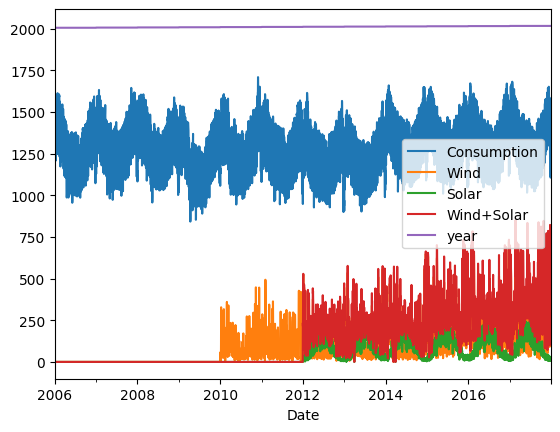

In [6]:
df.plot()

In [7]:
train = df.loc['2012':'2013']
validate = df.loc['2014':'2015']
test = df.loc['2016':'2017']

train.shape, validate.shape, test.shape

((731, 6), (730, 6), (731, 6))

In [8]:
train.head()

,Consumption,Wind,Solar,Wind+Solar,month,year
Date,,,,,,
2012-01-01,948.128,227.465,6.587,234.052,January,2012
2012-01-02,1269.581,207.327,6.574,213.901,January,2012
2012-01-03,1334.745,473.468,24.679,498.147,January,2012
2012-01-04,1347.136,499.804,14.681,514.485,January,2012
2012-01-05,1376.658,523.851,5.071,528.922,January,2012


In [12]:
num_cols = ['Consumption', 'Wind', 'Solar', 'Wind+Solar']
wind_and_solar = ['Wind', 'Solar']


In [13]:
create_month_sums = train.resample('m')[wind_and_solar].sum()
create_week_sums = train.resample('w')[wind_and_solar].sum()
create_day_sums = train.resample('d')[wind_and_solar].sum()


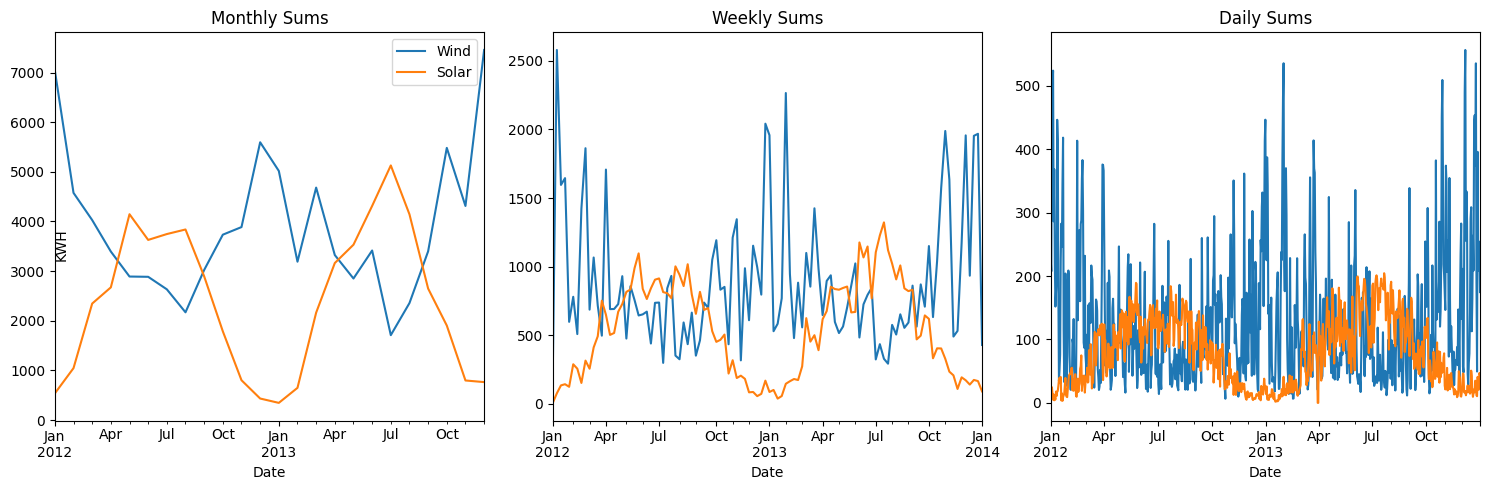

In [23]:
# consume a figure with three subplots in a horizontal layout
fig, axs = plt.subplots(1, 3, figsize=(15, 5))  # 1 row and 3 columns

# Plot the data in each subplot
create_month_sums.plot(ax=axs[0], title='Monthly Sums', legend=True)
create_week_sums.plot(ax=axs[1], title='Weekly Sums', legend=False)
create_day_sums.plot(ax=axs[2], title='Daily Sums', legend=False)

# Add a common y-label
fig.text(0.04, 0.5, 'KWH', va='center', rotation='vertical')

# Display the plots
plt.tight_layout()
plt.show()


In [163]:
consume_month_sums = train.resample('m')['Consumption'].sum()
consume_week_sums = train.resample('w')['Consumption'].sum()
consume_day_sums = train.resample('d')['Consumption'].sum()

consume_week_sums = consume_week_sums.iloc[1:-1]

In [157]:
consume_week_sums

Date
2012-01-08     8898.406
2012-01-15     9527.705
2012-01-22     9785.875
2012-01-29     9794.683
2012-02-05    10230.831
                ...    
2013-12-01     9810.445
2013-12-08     9991.420
2013-12-15     9830.307
2013-12-22     9540.871
2013-12-29     7598.396
Freq: W-SUN, Name: Consumption, Length: 104, dtype: float64

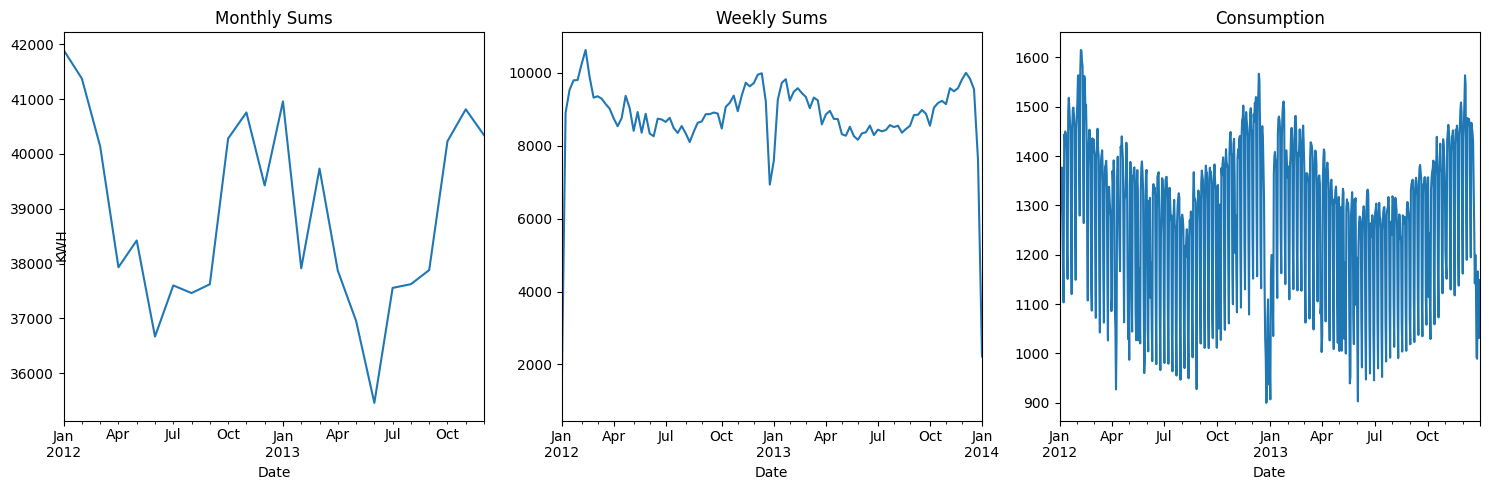

In [160]:

# consume a figure with three subplots in a horizontal layout
fig, axs = plt.subplots(1, 3, figsize=(15, 5))  # 1 row and 3 columns

# Plot the data in each subplot
consume_month_sums.plot(ax=axs[0], title='Monthly Sums', legend=False)
consume_week_sums.plot(ax=axs[1], title='Weekly Sums', legend=False)
consume_day_sums.plot(ax=axs[2], title='Daily Sums', legend=False)

# Add a common y-label
fig.text(0.04, 0.5, 'KWH', va='center', rotation='vertical')

# Display the plots
plt.tight_layout()
plt.title('Consumption')
plt.show()


In [164]:
consume_month_sums_results = sm.tsa.seasonal_decompose(consume_month_sums)
consume_week_sums_results = sm.tsa.seasonal_decompose(consume_week_sums)
consume_day_sums_results = sm.tsa.seasonal_decompose(consume_day_sums)

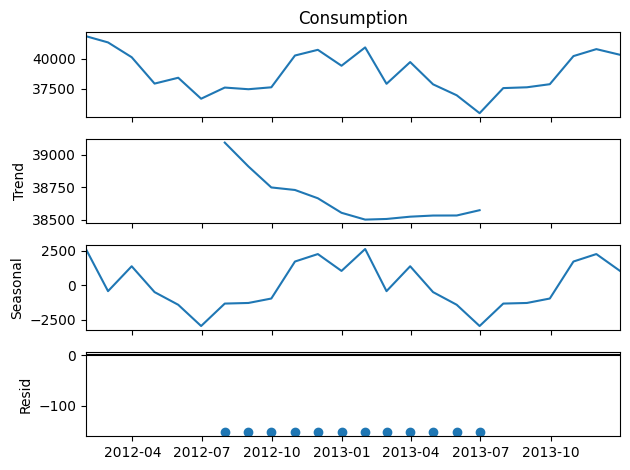

In [127]:
consume_month_sums_results.plot()
plt.show()

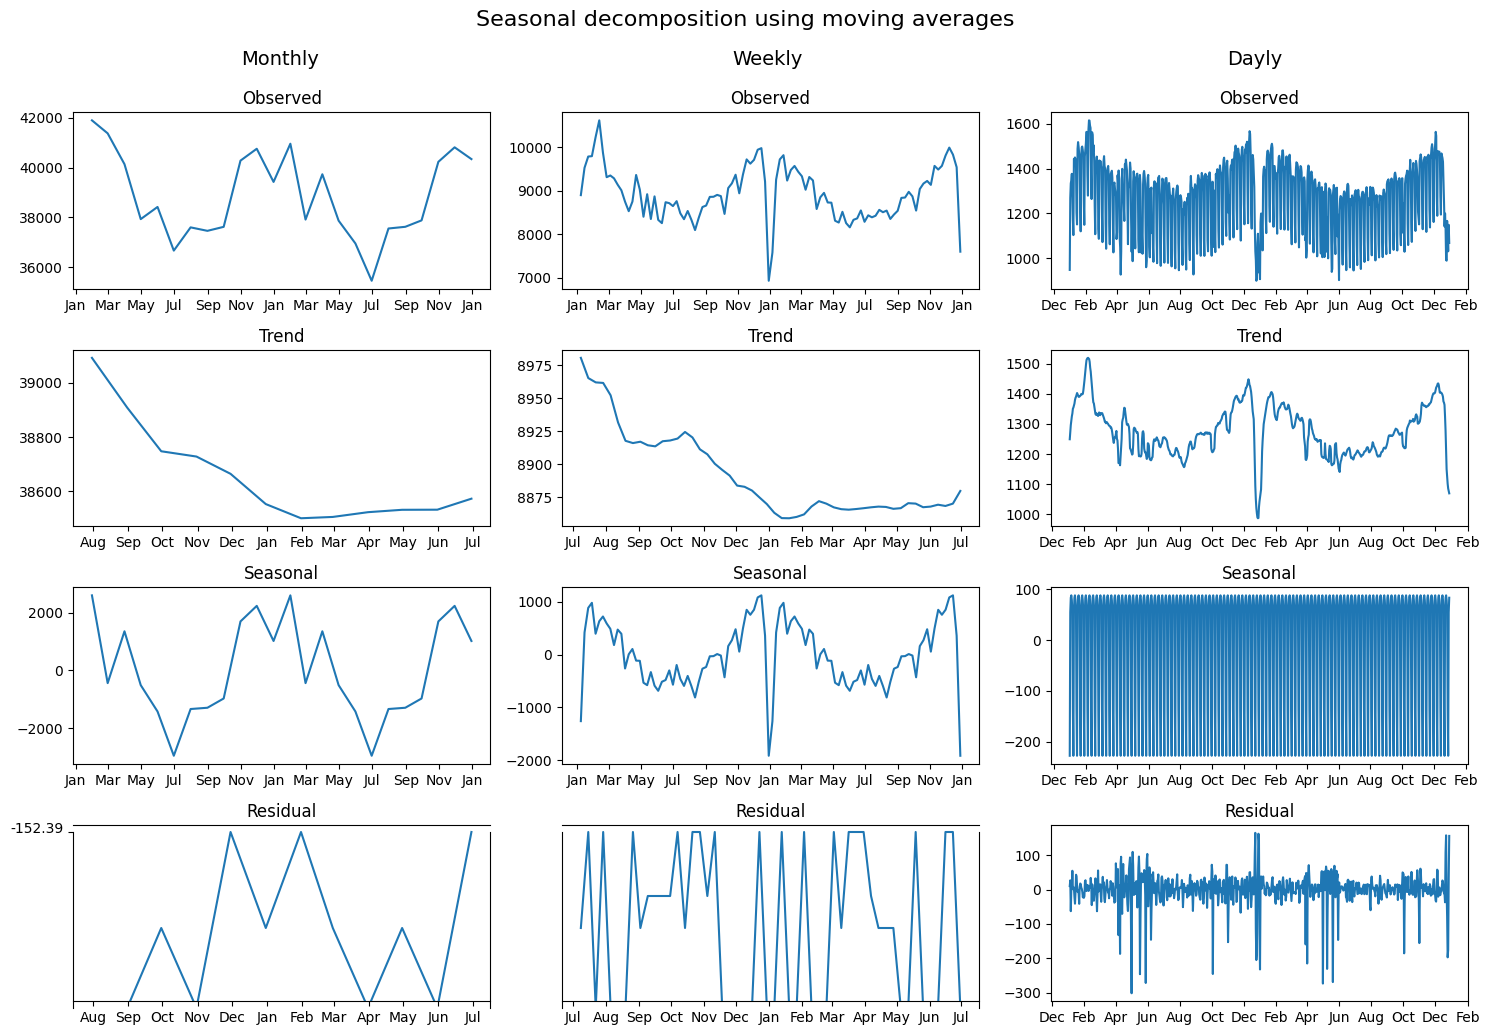

In [165]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as mtick 


# Create a single figure with subplots
fig, axes = plt.subplots(4, 3, figsize=(15, 10))  # 4 rows, 3 columns for the three results and their components

# Define a function to format y-axis labels to two decimal places
def format_yaxis(value, pos):
    return f'{value:.2f}'

# Create the formatter
y_formatter = FuncFormatter(format_yaxis)

# Plot components for consume_month_sums_results
axes[0, 0].plot(consume_month_sums_results.observed)
axes[0, 0].set_title("Observed")
axes[1, 0].plot(consume_month_sums_results.trend)
axes[1, 0].set_title("Trend")
axes[2, 0].plot(consume_month_sums_results.seasonal)
axes[2, 0].set_title("Seasonal")
axes[3, 0].plot(consume_month_sums_results.resid)
axes[3, 0].set_title("Residual")
axes[3, 0].set_ylim(consume_month_sums_results.resid.min(), consume_month_sums_results.resid.max())  # Adjust y-axis limits
axes[3, 0].yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: '{:.2f}'.format(x)))

# Plot components for consume_week_sums_results
axes[0, 1].plot(consume_week_sums_results.observed)
axes[0, 1].set_title("Observed")
axes[1, 1].plot(consume_week_sums_results.trend)
axes[1, 1].set_title("Trend")
axes[2, 1].plot(consume_week_sums_results.seasonal)
axes[2, 1].set_title("Seasonal")
axes[3, 1].plot(consume_week_sums_results.resid)
axes[3, 1].set_title("Residual")
axes[3, 1].set_ylim(consume_week_sums_results.resid.min(), consume_week_sums_results.resid.max())
axes[3, 1].yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: '{:.2f}'.format(x)))

# Plot components for consume_day_sums_results
axes[0, 2].plot(consume_day_sums_results.observed)
axes[0, 2].set_title("Observed")
axes[1, 2].plot(consume_day_sums_results.trend)
axes[1, 2].set_title("Trend")
axes[2, 2].plot(consume_day_sums_results.seasonal)
axes[2, 2].set_title("Seasonal")
axes[3, 2].plot(consume_day_sums_results.resid)
axes[3, 2].set_title("Residual")
axes[3, 2].set_ylim(auto=True)  # Adjust y-axis limits

# Format x-axis with month names (without year) and limit to 12 ticks (one for each month)
month_formatter = mdates.DateFormatter('%b')
for ax in axes.flatten():
    ax.xaxis.set_major_locator(mdates.MonthLocator())
    ax.xaxis.set_major_formatter(month_formatter)
    ax.set_xticks(ax.get_xticks()[::len(ax.get_xticks()) // 12])  # Limit ticks to 12
    

fig.suptitle("Seasonal decomposition using moving averages", fontsize=16, y=1.03, va='top')

# Add column titles
fig.text(0.19, .99, "Monthly", fontsize=14, ha='center', va='top')
fig.text(0.515, .99, "Weekly", fontsize=14, ha='center', va='top')
fig.text(0.84, .99, "Dayly", fontsize=14, ha='center', va='top')

plt.tight_layout()  # Ensure subplots do not overlap
plt.show()


___
# STORE
___

In [ ]:
df = pd.read_csv('stores.csv', index_col=0)
df.head()

,sale_amount,item_brand,item_name,item_price,store_address,store_zipcode,store_city,store_state,month,day_of_week,sales_total
sale_date,,,,,,,,,,,
2013-01-01,13,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253,San Antonio,TX,January,Tuesday,10.92
2013-01-01,26,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,12018 Perrin Beitel Rd,78217,San Antonio,TX,January,Tuesday,218.40
2013-01-01,27,Mama Marys,Pizza Sauce,4.65,12018 Perrin Beitel Rd,78217,San Antonio,TX,January,Tuesday,125.55
2013-01-01,54,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,15000 San Pedro Ave,78232,San Antonio,TX,January,Tuesday,453.60
2013-01-01,35,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,735 SW Military Dr,78221,San Antonio,TX,January,Tuesday,294.00


As some of you have noticed, datetime objects will be read in as strings from csv files. Let's set our index as the proper datetime datatype.

In [ ]:
df.index = pd.to_datetime(df.index)
df.head()

,sale_amount,item_brand,item_name,item_price,store_address,store_zipcode,store_city,store_state,month,day_of_week,sales_total
sale_date,,,,,,,,,,,
2013-01-01,13,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253,San Antonio,TX,January,Tuesday,10.92
2013-01-01,26,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,12018 Perrin Beitel Rd,78217,San Antonio,TX,January,Tuesday,218.40
2013-01-01,27,Mama Marys,Pizza Sauce,4.65,12018 Perrin Beitel Rd,78217,San Antonio,TX,January,Tuesday,125.55
2013-01-01,54,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,15000 San Pedro Ave,78232,San Antonio,TX,January,Tuesday,453.60
2013-01-01,35,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,735 SW Military Dr,78221,San Antonio,TX,January,Tuesday,294.00


Let's decide how to split our data into train/validate/test subsets before we begin exploration.

In [ ]:
df.index.max(), df.index.min()

(Timestamp('2017-12-31 00:00:00'), Timestamp('2013-01-01 00:00:00'))

In [ ]:
train = df.loc[:'2015']
validate = df.loc['2016']
test = df.loc['2017']

train.shape, validate.shape, test.shape

((547500, 11), (183000, 11), (182500, 11))

In [ ]:
train.store_address.nunique()

10

In [ ]:
store_sums = train.groupby('store_address').sale_amount.sum().sort_values(ascending=True)
store_sums

store_address
12018 Perrin Beitel Rd     1852468
1520 Austin Hwy            2024724
1015 S WW White Rd         2025504
12125 Alamo Ranch Pkwy     2406336
516 S Flores St            2796994
735 SW Military Dr         2803588
8503 NW Military Hwy       2991622
2118 Fredericksburg Rdj    3030559
15000 San Pedro Ave        3267598
9255 FM 471 West           3414219
Name: sale_amount, dtype: int64

In [ ]:
store_sums.info()

<class 'pandas.core.series.Series'>
Index: 10 entries, 12018 Perrin Beitel Rd to 9255 FM 471 West
Series name: sale_amount
Non-Null Count  Dtype
--------------  -----
10 non-null     int64
dtypes: int64(1)
memory usage: 460.0+ bytes


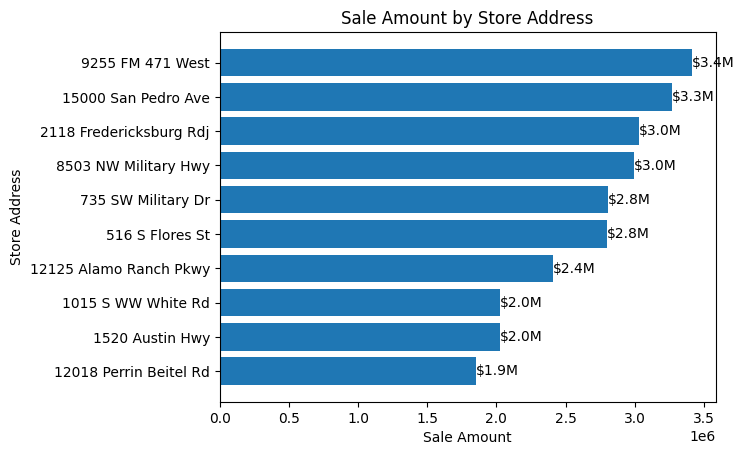

In [ ]:
# Create the horizontal bar chart
plt.barh(store_sums.index, store_sums.values)

# Annotate the bars with their values at the top
for i, sale_amount in enumerate(store_sums.values):
    plt.text(sale_amount, i, '${:.1f}M'.format(sale_amount / 1e6), va='center')

plt.xlabel('Sale Amount')
plt.ylabel('Store Address')
plt.title('Sale Amount by Store Address')

plt.show()

In [ ]:
train.groupby('day_of_week').sales_total.sum()

day_of_week
Friday       21540401.66
Monday       16175493.46
Saturday     22924358.67
Sunday       24292182.53
Thursday     20284125.10
Tuesday      18924016.28
Wednesday    18948380.83
Name: sales_total, dtype: float64

In [ ]:
train.head()

,sale_amount,item_brand,item_name,item_price,store_address,store_zipcode,store_city,store_state,month,day_of_week,sales_total
sale_date,,,,,,,,,,,
2013-01-01,13,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253,San Antonio,TX,January,Tuesday,10.92
2013-01-01,26,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,12018 Perrin Beitel Rd,78217,San Antonio,TX,January,Tuesday,218.40
2013-01-01,27,Mama Marys,Pizza Sauce,4.65,12018 Perrin Beitel Rd,78217,San Antonio,TX,January,Tuesday,125.55
2013-01-01,54,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,15000 San Pedro Ave,78232,San Antonio,TX,January,Tuesday,453.60
2013-01-01,35,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,735 SW Military Dr,78221,San Antonio,TX,January,Tuesday,294.00


In [ ]:
day_sample =train.resample('d').sales_total.sum()

<Axes: xlabel='sale_date'>

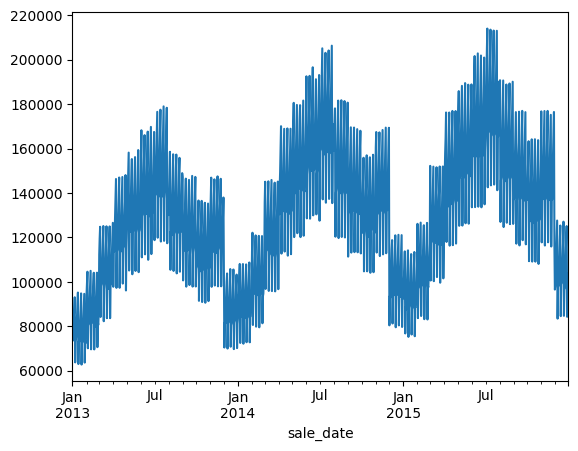

In [ ]:
day_sample.plot()

In [ ]:
month_sample =train.resample('m').sales_total.sum()

<Axes: xlabel='sale_date'>

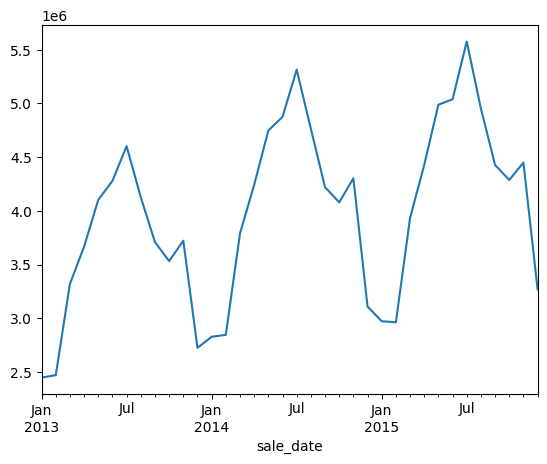

In [ ]:
month_sample.plot()

In [ ]:
day_sample.shift(-30)

sale_date
2013-01-01     79237.27
2013-01-02     94066.76
2013-01-03     98943.56
2013-01-04    104593.10
2013-01-05     70131.45
                ...    
2015-12-27          NaN
2015-12-28          NaN
2015-12-29          NaN
2015-12-30          NaN
2015-12-31          NaN
Freq: D, Name: sales_total, Length: 1095, dtype: float64

In [ ]:
month_shift = pd.DataFrame({'now':day_sample,
                            'one_month_out': day_sample.shift(-30)})
month_shift

,now,one_month_out
sale_date,,
2013-01-01,73844.01,79237.27
2013-01-02,73570.58,94066.76
2013-01-03,78169.48,98943.56
2013-01-04,84467.73,104593.10
2013-01-05,87621.85,70131.45
...,...,...
2015-12-27,125125.86,NaN
2015-12-28,84297.45,NaN
2015-12-29,98602.75,NaN


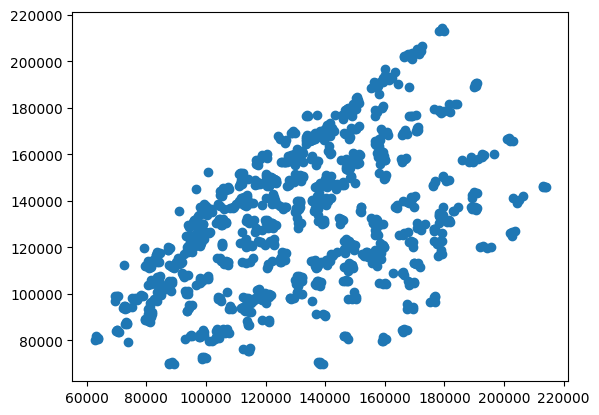

In [ ]:
plt.scatter(x=month_shift.now, y=month_shift.one_month_out)

In [ ]:
half_shift = pd.DataFrame({'now':day_sample,
                            'half_year_out': day_sample.shift(-182)})
half_shift

,now,half_year_out
sale_date,,
2013-01-01,73844.01,139006.90
2013-01-02,73570.58,139195.12
2013-01-03,78169.48,148207.22
2013-01-04,84467.73,157551.04
2013-01-05,87621.85,167910.51
...,...,...
2015-12-27,125125.86,NaN
2015-12-28,84297.45,NaN
2015-12-29,98602.75,NaN


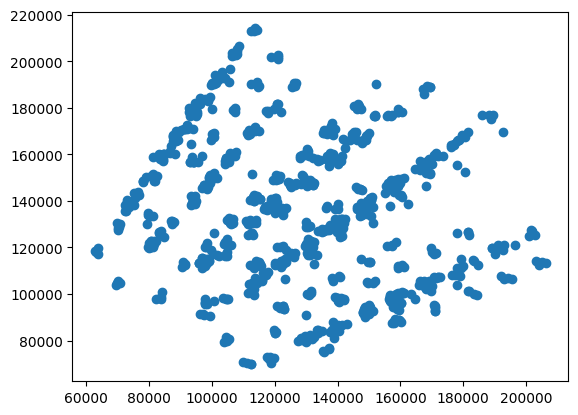

In [ ]:
plt.scatter(x=half_shift.now, y=half_shift.half_year_out)

In [ ]:
full_shift = pd.DataFrame({'now':day_sample,
                            'full_year_out': day_sample.shift(-364)})
full_shift

,now,full_year_out
sale_date,,
2013-01-01,73844.01,81161.40
2013-01-02,73570.58,83630.73
2013-01-03,78169.48,91960.63
2013-01-04,84467.73,94648.21
2013-01-05,87621.85,102914.89
...,...,...
2015-12-27,125125.86,NaN
2015-12-28,84297.45,NaN
2015-12-29,98602.75,NaN


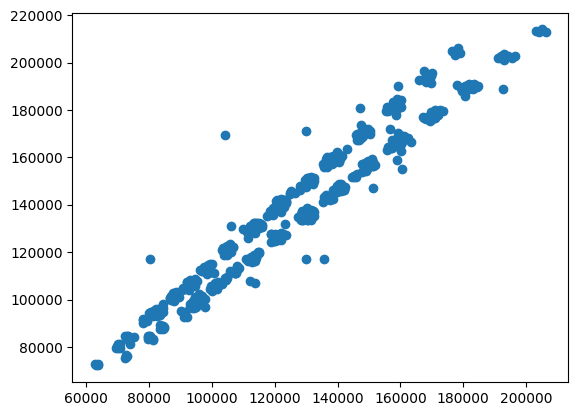

In [ ]:
plt.scatter(x=full_shift.now, y=full_shift.full_year_out)

In [ ]:
week_sample =train.resample('w').sales_total.sum()

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

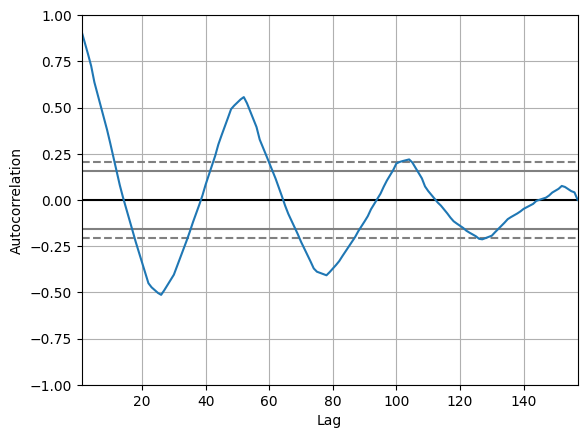

In [ ]:
pd.plotting.autocorrelation_plot(week_sample)

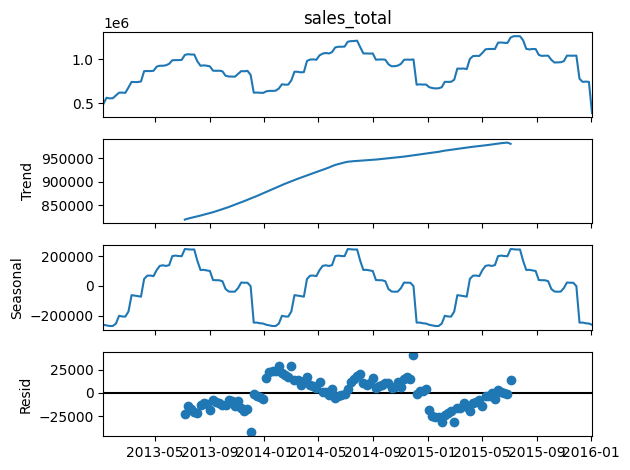

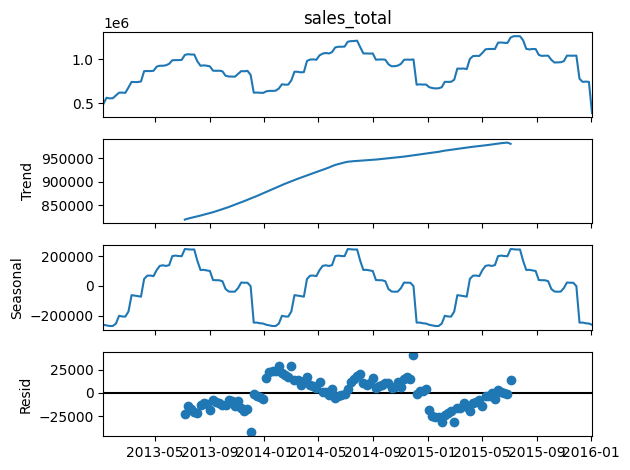

In [ ]:
results = sm.tsa.seasonal_decompose(week_sample)
results.plot()